In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [8]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

There are 10841 rows and 13 columns

Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

Yes, there are some missing as well unique value which has dispute with in set it makes difficult to make visualization and predict in unbiased manner.

In [38]:

df['Reviews'].str.isnumeric().sum()

9659

In [10]:
df[~df['Reviews'].str.isnumeric()] #converting nan values and data according to all

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
##Replacing the values which are unmatched with other data
df['Reviews'] = df['Reviews'].str.replace('3.0M','3000000')
df.drop(index=10472,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [15]:
df['Size'].unique() #for size

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [17]:
def convert_size(size):
  if 'M' in size:
    return int(float(size.replace('M',''))*1000)
  elif 'k' in size:
    return float(size.replace('k',''))
  elif 'Varies with device' in size:
    return np.nan
  else:
    return np.nan

#convert size
df['Size']=df['Size'].apply(convert_size)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [21]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [22]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [23]:
cols = ['Price'] #replacing price unmatched value
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,' ')

In [24]:
cols = ['Installs'] # replacing unmatched value and make in similar
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,' ')

In [25]:
df['Price'].unique()

array(['0', ' 4.99', ' 3.99', ' 6.99', ' 1.49', ' 2.99', ' 7.99', ' 5.99',
       ' 3.49', ' 1.99', ' 9.99', ' 7.49', ' 0.99', ' 9.00', ' 5.49',
       ' 10.00', ' 24.99', ' 11.99', ' 79.99', ' 16.99', ' 14.99',
       ' 1.00', ' 29.99', ' 12.99', ' 2.49', ' 10.99', ' 1.50', ' 19.99',
       ' 15.99', ' 33.99', ' 74.99', ' 39.99', ' 3.95', ' 4.49', ' 1.70',
       ' 8.99', ' 2.00', ' 3.88', ' 25.99', ' 399.99', ' 17.99',
       ' 400.00', ' 3.02', ' 1.76', ' 4.84', ' 4.77', ' 1.61', ' 2.50',
       ' 1.59', ' 6.49', ' 1.29', ' 5.00', ' 13.99', ' 299.99', ' 379.99',
       ' 37.99', ' 18.99', ' 389.99', ' 19.90', ' 8.49', ' 1.75',
       ' 14.00', ' 4.85', ' 46.99', ' 109.99', ' 154.99', ' 3.08',
       ' 2.59', ' 4.80', ' 1.96', ' 19.40', ' 3.90', ' 4.59', ' 15.46',
       ' 3.04', ' 4.29', ' 2.60', ' 3.28', ' 4.60', ' 28.99', ' 2.95',
       ' 2.90', ' 1.97', ' 200.00', ' 89.99', ' 2.56', ' 30.99', ' 3.61',
       ' 394.99', ' 1.26', ' 1.20', ' 1.04'], dtype=object)

In [26]:
df['Installs'].unique()

array(['10 000 ', '500 000 ', '5 000 000 ', '50 000 000 ', '100 000 ',
       '50 000 ', '1 000 000 ', '10 000 000 ', '5 000 ', '100 000 000 ',
       '1 000 000 000 ', '1 000 ', '500 000 000 ', '50 ', '100 ', '500 ',
       '10 ', '1 ', '5 ', '0 ', '0'], dtype=object)

In [27]:

cols = ['Installs'] # we canot change this space value and removing it
chars_to_remove=[' ']
for i in cols:
  for j in chars_to_remove:
    df[i] =df[i].str.replace(j,'')

In [28]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.1+ MB


In [31]:
## convert install and price into respective data type
df['Installs']=df['Installs'].astype('int')
df['Price'] = df['Price'].astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(1), object(9)
memory usage: 1.1+ MB


In [34]:
# convert date into day, month and year from the updated date
df['Last Updated'] =pd.to_datetime(df['Last Updated'])
df['day'] =df['Last Updated'].dt.day
df['month'] =df['Last Updated'].dt.month
df['year'] =df['Last Updated'].dt.year

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [36]:
# removing the duplicate item in a column
df.drop_duplicates(subset=['App'],keep='last',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,26,3,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [37]:
df['App'].duplicated().sum() #checking of having duplicate value

0

What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

Text(0, 0.5, 'Rating')

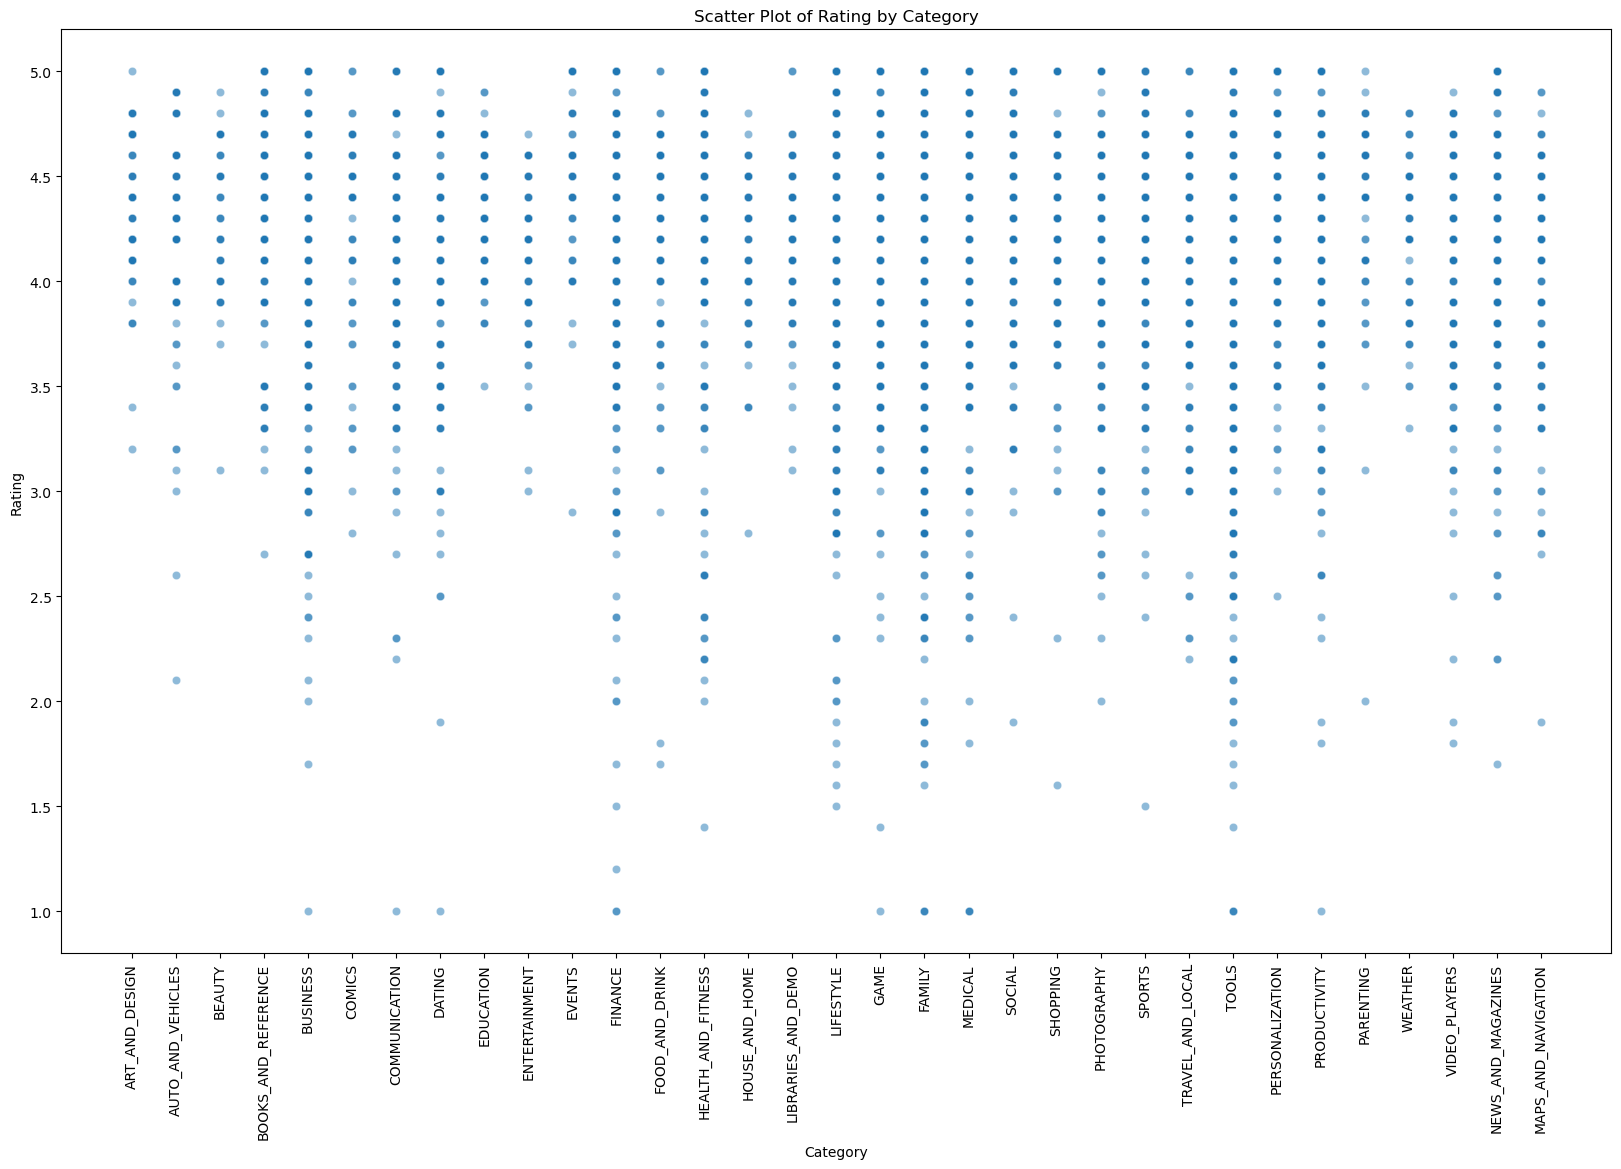

In [40]:

plt.figure(figsize=(20,12))
sns.scatterplot(x=df['Category'], y=df['Rating'], alpha=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Scatter Plot of Rating by Category') # Adding labels and title
plt.xlabel('Category')
plt.ylabel('Rating')

How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

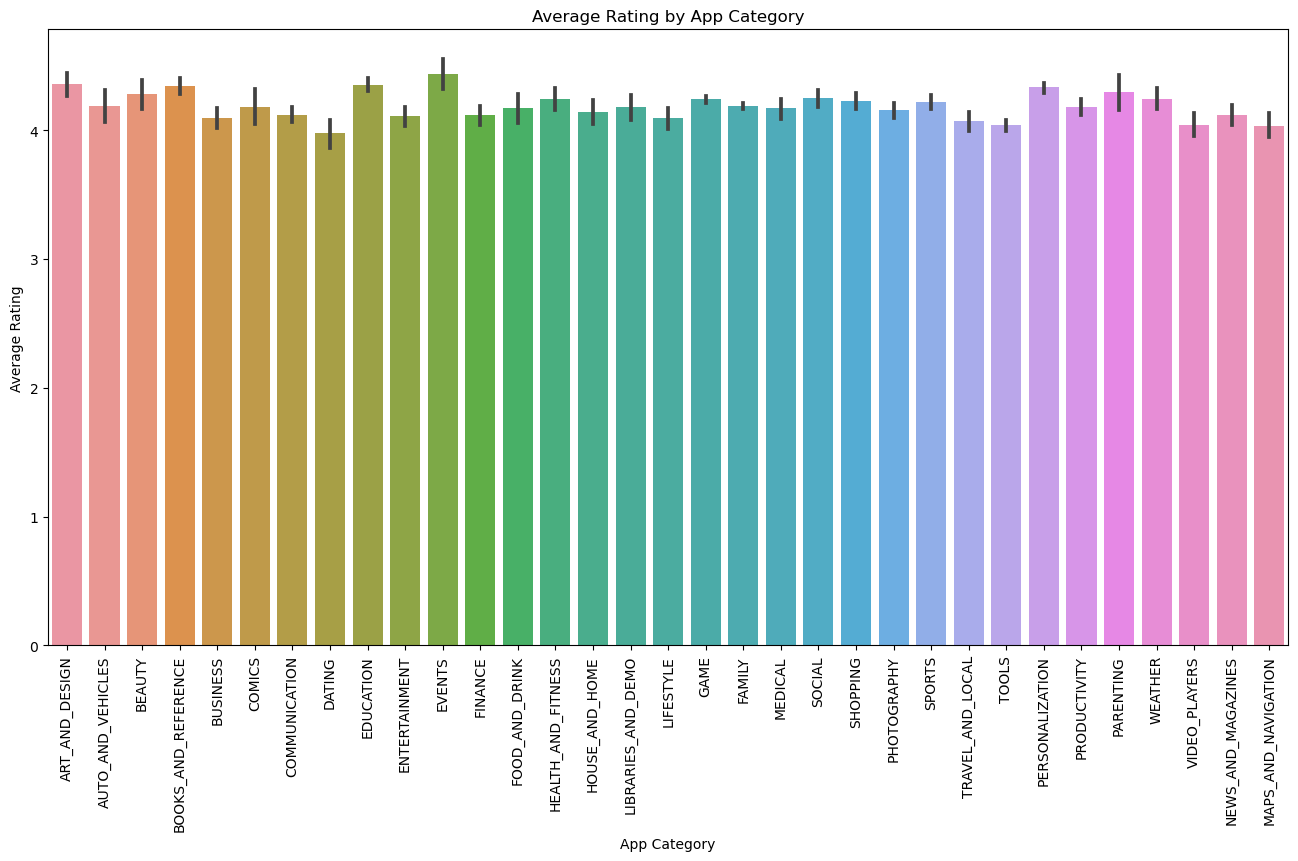

In [50]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Category', y='Rating', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.title('Average Rating by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Rating')

# Display the plot
plt.show()

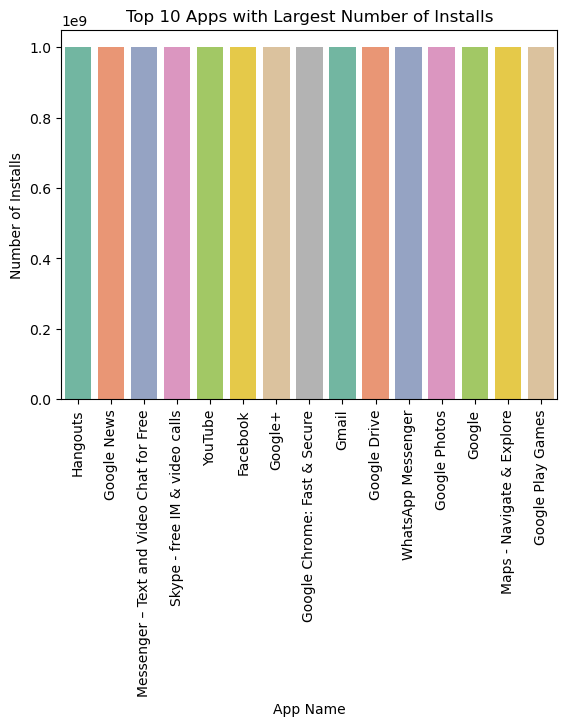

In [42]:
#Show top ten apps with largest no. of installs
df_top10 = df.sort_values(by='Installs', ascending=False).head(15)
sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.title('Top 10 Apps with Largest Number of Installs')
plt.show()

Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

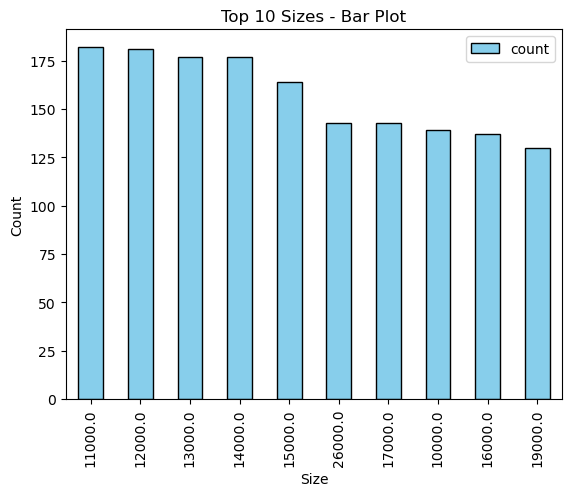

In [43]:
#top 10 apps with largest size
df_app_size = df['Size'].value_counts().sort_values(ascending=False).to_frame()


plt.figure(figsize=(12, 6))
df_app_size.head(10).plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Top 10 Sizes - Bar Plot')
plt.xlabel('Size')
plt.ylabel('Count')

How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [44]:
df['Type'].value_counts()

Type
Free    8904
Paid     754
Name: count, dtype: int64

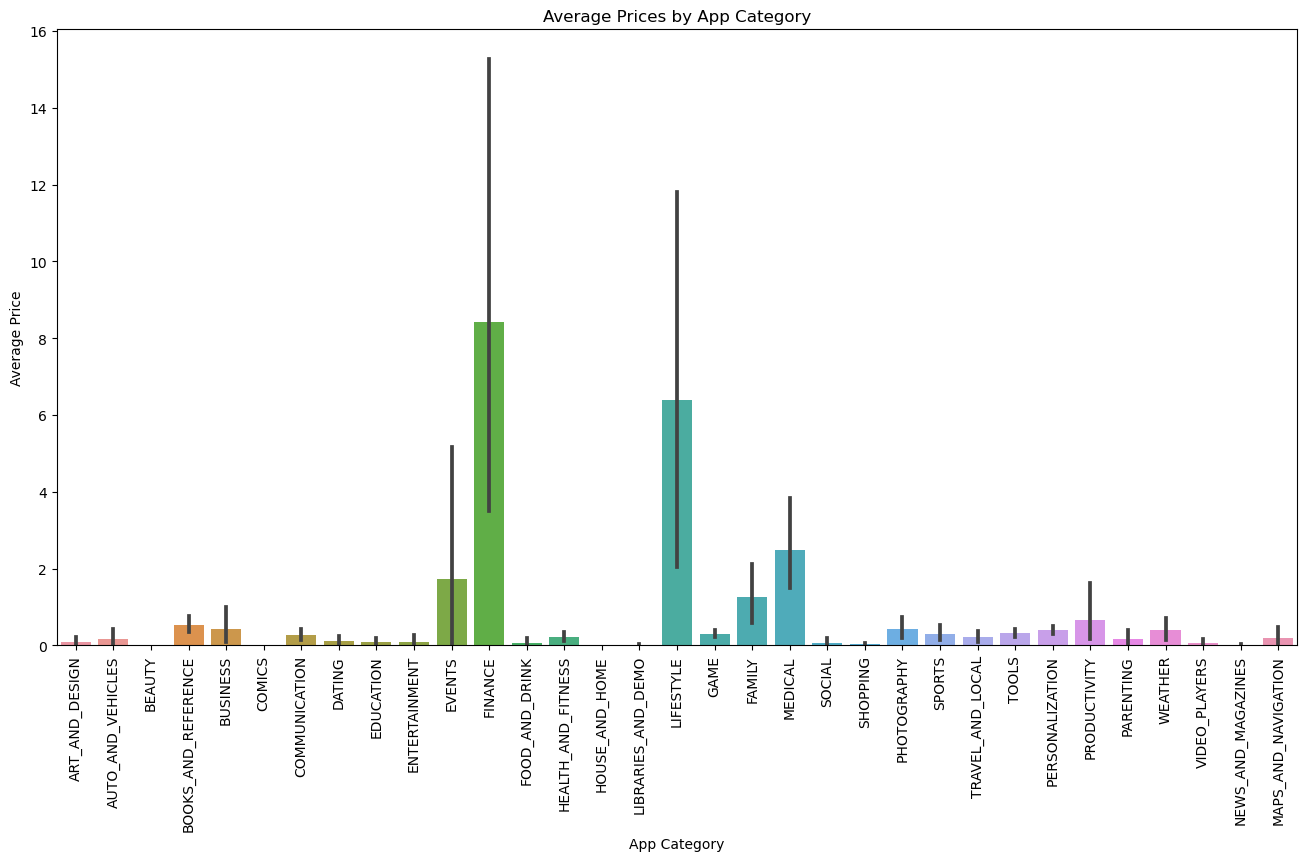

In [45]:
#since we have type as two data and category is used as type of application so we take category column
plt.figure(figsize=(16, 8))

# Create a bar chart using Seaborn
sns.barplot(x='Category', y='Price', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adding labels and title
plt.title('Average Prices by App Category')
plt.xlabel('App Category')
plt.ylabel('Average Price')

# Display the plot
plt.show()

hat are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

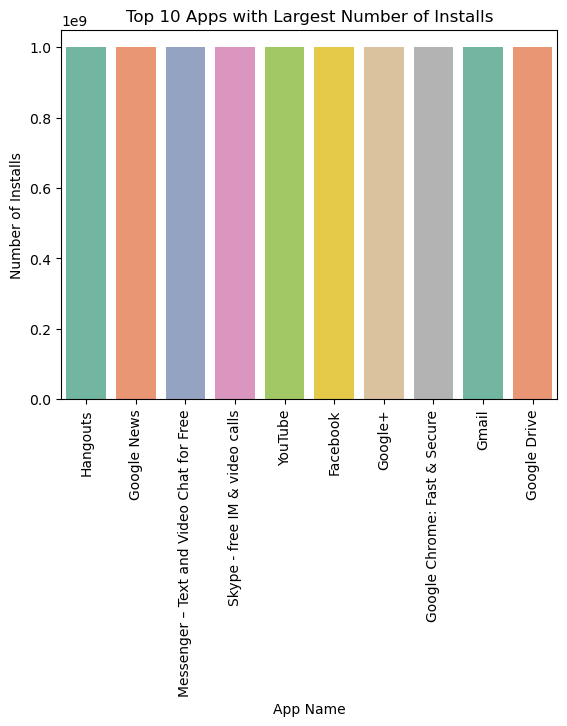

In [46]:
#Show top ten apps with largest no. of installs
df_top10 = df.sort_values(by='Installs', ascending=False).head(10)
sns.barplot(x=df_top10['App'], y=df_top10['Installs'], palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('App Name')
plt.ylabel('Number of Installs')
plt.title('Top 10 Apps with Largest Number of Installs')
plt.show()

A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

1. For launching new app; firstly, i would like to clean the data if they have any missing value, outliers, non values and if they use differnet parameter for visualization purpose

2. Then perform some discriptive analysis tasks like charts which are usefule to describe the situation properly. Like, on different variables(number of installations, ratings, size of app, reviews etc).



A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

1. I would like to check the firstly, the number of installation apps(top): for this i use the bar plot or pie chart for understaning or finding out number of installation.

2. the second thing is Version test of the installation appps of top 

3. Size checking by using  scatter plot is good for to analyze


A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

1. App installs trend (by using time series line chart over different period of time)

2. Average rating trend(by same method of time series line chart in average rating over time

3. Reviews Trend (helps to make feedback associated with app issues)

4. Sactter plot  for different users with different variables that are related to same app category.
